In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

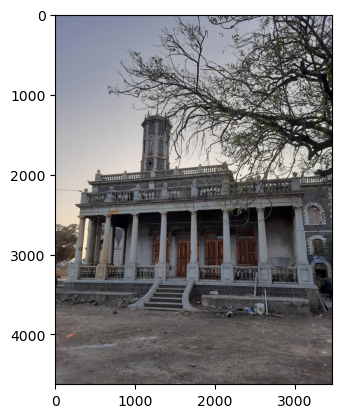

In [76]:
img_clr = cv2.imread('IMG_20190414_104624.jpg')

plt.imshow(img_clr)

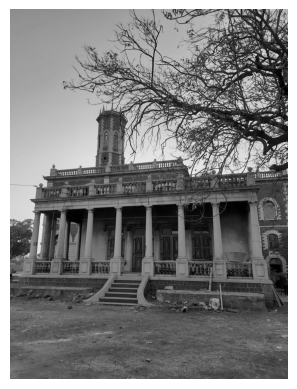

In [57]:
img_gray = cv2.cvtColor(img_clr, cv2.COLOR_BGR2GRAY)


plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

Binary Image

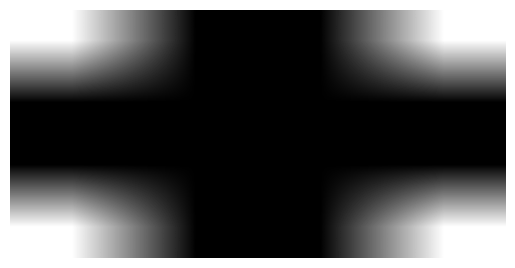

In [58]:
img_bin = np.array([[255,0,0,255],
                    [0,0,0,0],
                    [0,0,0,0],
                    [255,0,0,255]], dtype = np.uint8)


new_size = (800,400)
resize_img_bin = cv2.resize(img_bin, new_size)

plt.imshow(resize_img_bin, cmap ='gray')
plt.axis("off")
plt.show()

ENHANCEMENT 

In [60]:
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    adjusted = cv2.convertScaleAbs(image, alpha = 1+contrast/50, beta = brightness)
    return adjusted


bright_image = adjust_brightness_contrast(img_clr, brightness = 20, contrast = 60)
#plt.imshow(bright_image)

bright_gray_image = adjust_brightness_contrast(img_gray, brightness = 25, contrast = 60)
#plt.imshow(bright_gray_image)


bright_bin_image = adjust_brightness_contrast(img_bin, brightness = 25, contrast = 60)
#plt.imshow(bright_bin_image)

In [61]:
negative_image = 255 - img_clr

negative_gray_image = 255 - img_gray

negative_bin_image = 255 - img_bin

In [62]:
blue, green , red = cv2.split(img_clr)

red_channel = img_clr[:,:,2]

green_channel = img_clr[:,:,1]

blue_channel = img_clr[:,:,0]


In [63]:
negative_blue = 255 - blue

negative_green = 255 - green

negative_red = 255 - red

negative_image_custom = cv2.merge((negative_green,negative_blue,negative_red))

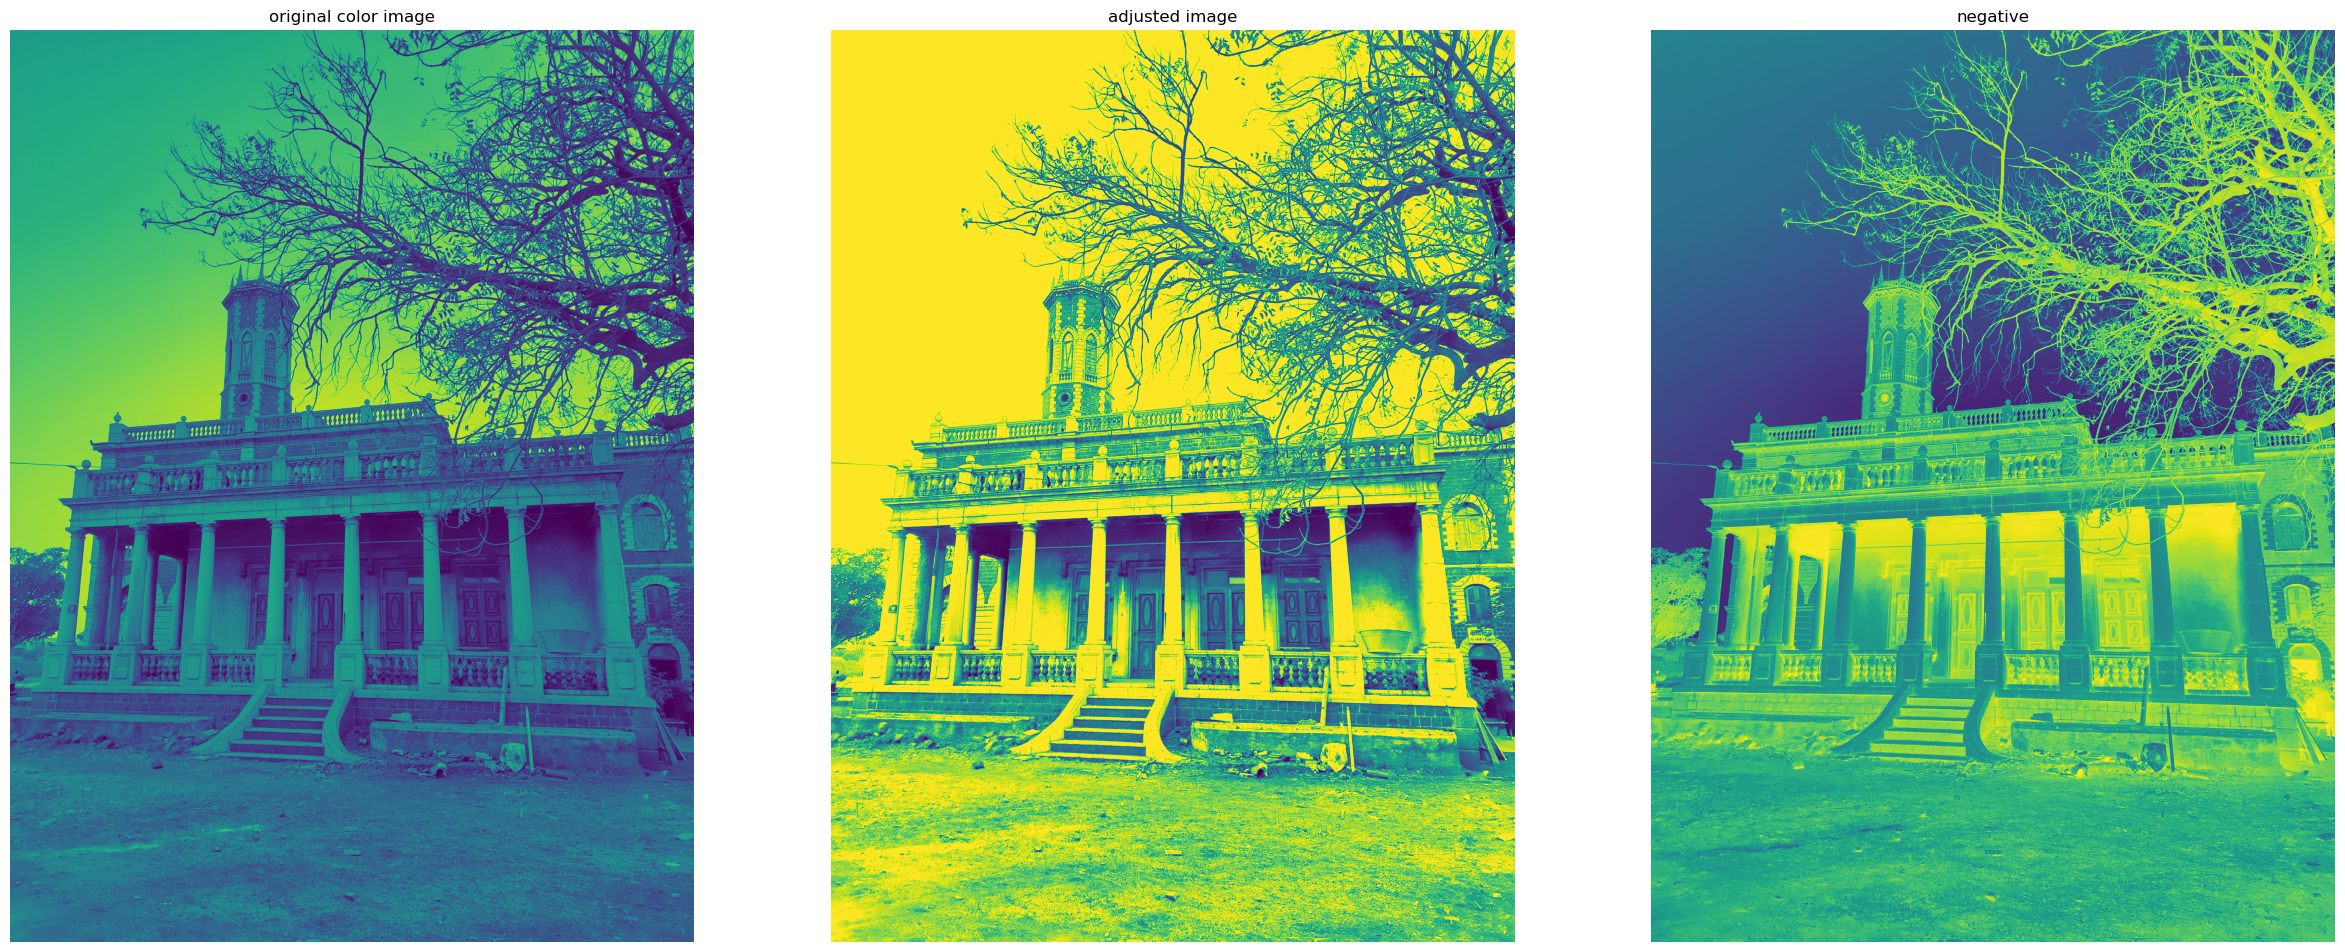

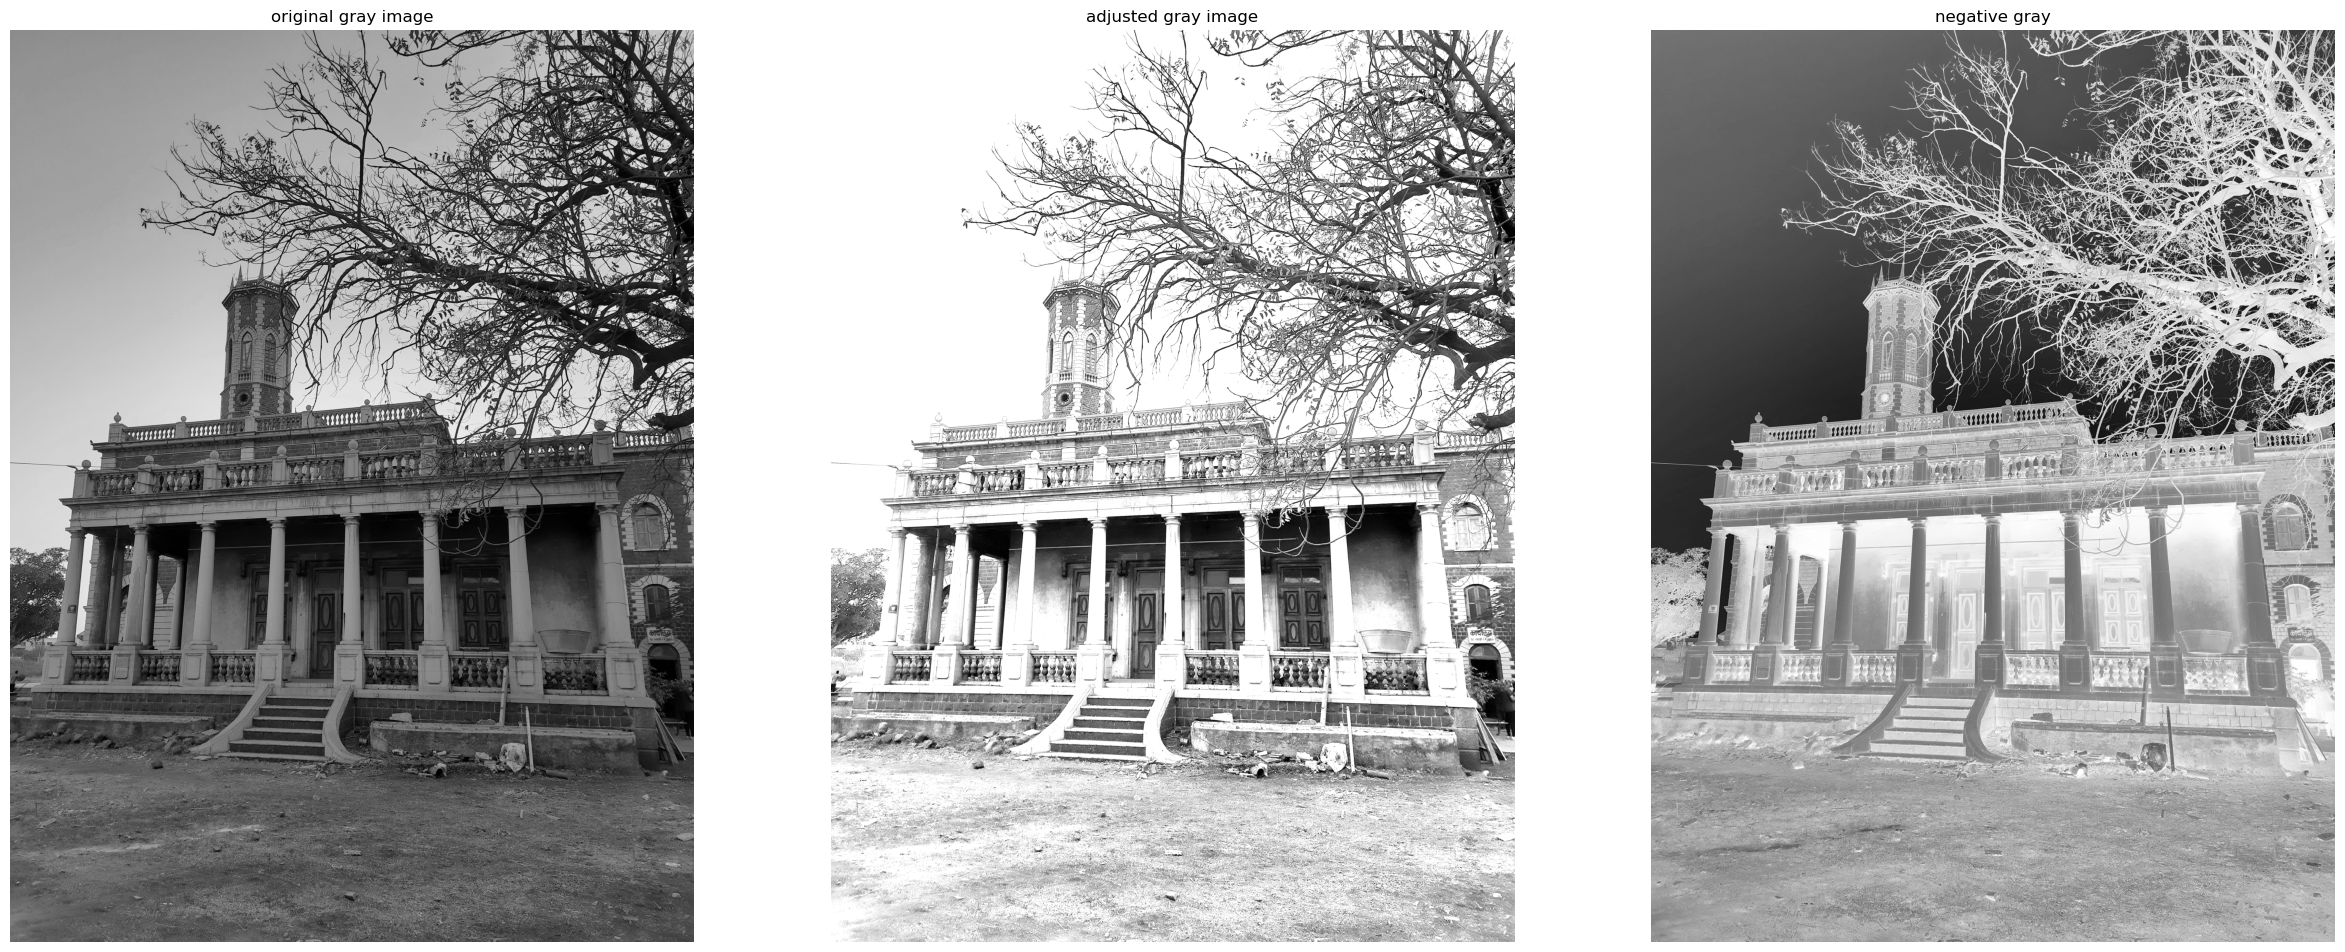

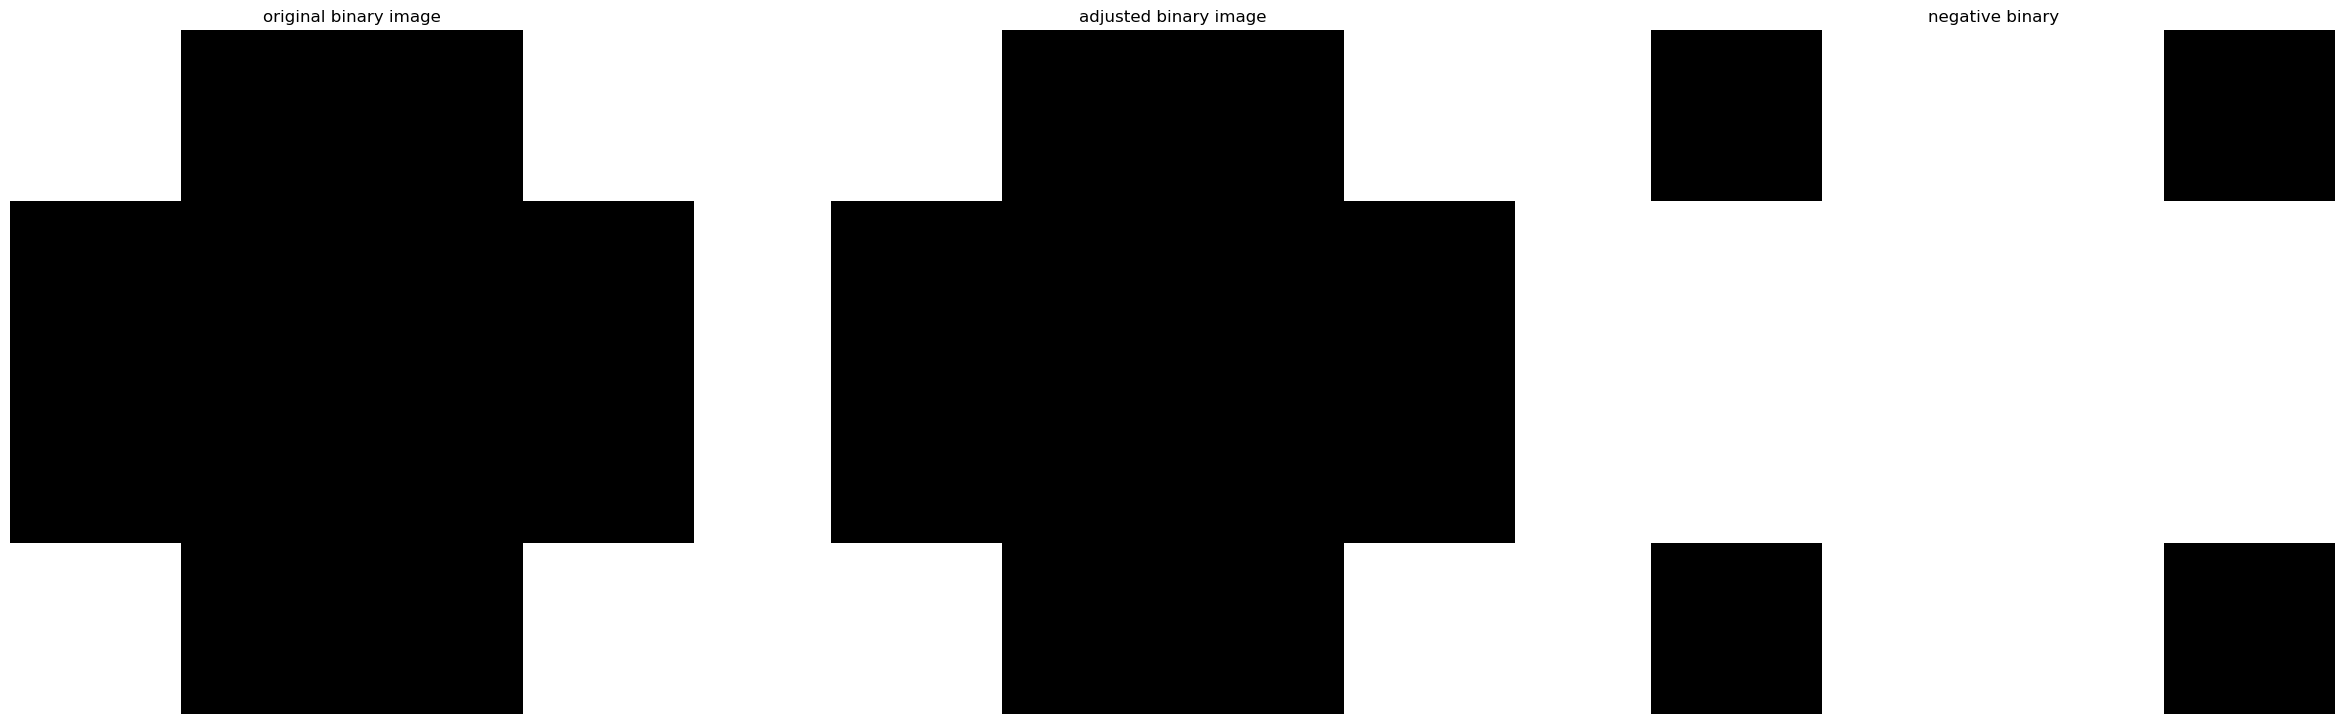

In [64]:
def plot_images(images, titles, cmap = None):
    plt.figure(figsize = (30,15))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap=cmap if cmap else 'gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        plt.title(title)
        plt.axis('off')
    plt.show()


images1 = [img_clr, bright_image, negative_image]
titles1 = ['original color image','adjusted image', 'negative']
plot_images(images1,titles1)


images2 = [img_gray, bright_gray_image, negative_gray_image]
titles2 = ['original gray image','adjusted gray image', 'negative gray']
plot_images(images2,titles2)


images3 = [img_bin, bright_bin_image, negative_bin_image]
titles3 = ['original binary image','adjusted binary image', 'negative binary']
plot_images(images3,titles3)
